In [1]:
# Imports
from rocketpy import Environment, HybridMotor, Rocket, Flight, UllageBasedTank, CylindricalTank, Fluid, Function
import datetime
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
# Chargement des fichiers csv en fonctions rocketpy
# Coefficient drag de la fusée lorsque le moteur est éteint ou non
powerOn_function = Function(
    source='Data/powerDrag.CSV',
    outputs=["CD Power-On"]
)

powerOff_function = Function(
    source='Data/powerDrag.CSV',
    outputs=["CD Power-Off"]
)

# Volume occupé par gaz (ullage) selon le temps
ullage_volume = pd.read_csv('Data/Ullage_vol.csv', usecols = ['Time      (s)', 'volume_m3']).drop(10061).to_numpy()

volume_fonction = Function(
    source = ullage_volume,
    inputs = 'Time (sec)',
    outputs = ['volume_m3']
)

In [3]:
# Chargement données pour le tank
# Forme du tank
cylinder = CylindricalTank(
    radius = 0.085,
    height = 1.72,
    spherical_caps = True
)

# TODO : Vérifier densité
# https://docs.rocketpy.org/en/latest/user/motors/tanks.html#tanks-usage
liquid_N2O = Fluid(name="Liquid Nitrous Oxide", density=855)
vapour_N2O = Fluid(name="Vapour Nitrous Oxide", density=101)

FLUX_TIME = 10.059999999999864 # secondes

In [4]:
# Chargement données pour l'environnement du vol
DATE      = datetime.datetime(2024, 1, 26) # Date du launch (Y, M, D)
ELEVATION = 1400    # Élévation du site de launch
GEO_DATUM = 'NAD83' # Référence spatiale pour le Canada (correction de données)
TIMEZONE  = 'GMT-5'
MAX_H     = 30000   # Hauteur maximal attendu en m. Utilisé pour  ne pas avoir un surplus de données
LAT       = 0       # Latitude du spaceport
LON       = 0       # Longitude du spaceport

In [5]:
# Chargement données pour le moteur hybride
SOURCE    = "HYB30kpar.eng"
NAME      = "Kraken2.0"
BURN_TIME = 12.25
MOTOR_POSITION     = 5.456682  # Mesure tip nose cone - tip injecteur
COORDS_ORIENTATION = "nozzle_to_combustion_chamber"

# Masse solide
DRY_MASS      =  16940/1000                    # Masse de la structure excluant le propellant [Bilan masses]
DRY_INERTIA   = [0.98, 0.98 , 0.06, 0, 0, 0]   # Inertie de la masse solide (liste en kg*m^2) Solidworks (I_11, I_22, I_33, I_12, I_13, I_23)
CM_DRY        =  0.391922                      # Centre de masse de la masse solide (m)
NOZZLE_RADIUS =  0.0760476
NOZZLE_POS    =  0                             # Position du nozzle. 0 car c le ref du moteur
THROAT_RADIUS =  0.042291                      # ? Rayon du throat du nozzle. Pas nécessaire dans certains simulations

# Grain data
GRAIN_N         = 1           # Nombre de grains
GRAIN_DENSITY   = 0.503381099 # Densité du grain (kg/m^3)
GRAIN_ORAD      = 0.1278      # rayon extérieur du grain (m)
GRAIN_INIT_IRAD = 0.0620      # rayon initial intérieur (m)
GRAIN_INIT_H    = 0.553974      # Hauteur initiale (m)
GRAIN_SEP       = 0           # Distance entre 2 grains (0 car 1 seul grain)
GRAIN_CM        = 0.440182    # Centre de masse (m) nozzle to grain_cm

In [6]:
# Chargement données de la fusée
# Construction fusée
ROCKET_RAD     =  0.18                                   # le rayon maximal de la fusée (excluant les ailettes) en mètres
ROCKET_MASS    =  52.23                                  # Masse de la fusée sans le moteur (kg) [Solidworks]
# ROCKET_INERTIA = [94.91, 94.90, 0.27, 0, -0.09, 0]       # liste des inerties. [I_11, I_22, I_33, I_12, I_13, I_23]
ROCKET_INERTIA = [73.35, 73.36, 0.32, 0, -0.09, 0.03]    # liste des inerties. [I_11, I_22, I_33, I_12, I_13, I_23]
ROCKET_CM      =  2.407666                               # Centre de masse de la fusée sans le moteur
ROCKET_COORDS  =  "tail_to_nose"                         # Référence pour tous les données de type mesures (longeur, cm, etc.)

# Nose cone
NC_L     = 0.79          # Longueur du nose cone
NC_KIND  = "von karman"  # Forme du nose cone
NC_POS   = 5.12          # Position du nose cone.
NC_BLUFF = 0             # Ratio entre le rayon du tip de l'ogive et le rayon à la base de l'ogive. Optionnel

# Ailettes
FIN_N     =  3           # nombre d'ailettes
FIN_SPAN  =  0.25019     # Hauteur des ailettes en mètres
FIN_RC    =  -0.435864   # Root chord des ailettes en mètres
FIN_TC    =  -0.127      # Tip chord des ailettes en mètres
FIN_POS   =  0.077724    # Position du top des ailettes à partir du nose cone en mètres
FIN_SWEEP =  0.180594    # Sweep length en mètres
FIN_ANGLE = 56.4         # Sweep angle. Ne peut pas être utilisé en même temps que sweep length

# Boattail
TAIL_TOP    = 0.174244  # Rayon du top du tail en mètres
TAIL_BOTTOM = 0.092456  # Rayon du bottom du tail en mètres
TAIL_L      = 0.058674  # Longueur du tail en mètres
TAIL_POS    = 0.065024   # Position du tail selon le nose cone

# Parachutes
MAIN_NAME  = "Main Parachute" # Nom du parachute principal
MAIN_CD    = 0 # F = ((1/2)*rho*V^2)*cd_s === Coefficient drag * aire référence. Utilisé pour calculer la force du drag
MAIN_EJECT = 0 # Hauteur d'éjection du parachute en mètres
MAIN_LAG   = 0 # Temps entre trigger et éjection en secondes (optionel)

DRAG_NAME  = "Drag Parachute"
DRAG_CD    = 0
DRAG_EJECT = 0
DRAG_LAG   = 0

# Rails
BUTTON_TOP    = 0 # Position du bouton le plus éloigné du nozzle (selon nose cone) (m) pas necessaire
BUTTON_BOTTOM = 0 # Position du bouton le plus proche du nozzle (selon nose cone) (m)pas necessaire
BUTTON_ANG    = 0 # Position angulaire des boutons en degrés (selon axes symmétriques de la fusée relative aux axes principales)

In [7]:
# Chargement données pour la simulation du vol
RAIL_L    = 9.144 # Longueur de la surface entre la fusée et le rail 30 pieds
RAIL_INC  = 90-6 # Inclinaison du rail relative au sol en degrés
RAIL_HEAD = 6 # Angle relative au nord en degrés

In [8]:
# Création tank
Kronos_Tank = UllageBasedTank(
    name       = "Tank",
    geometry   = cylinder,
    flux_time  = FLUX_TIME,
    liquid     = liquid_N2O,
    gas        = vapour_N2O,
    ullage     = volume_fonction,
    discretize = None
)

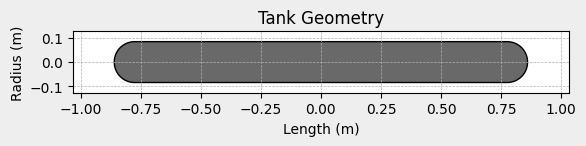

In [9]:
Kronos_Tank.draw()

In [10]:
# Création du moteur
Kraken = HybridMotor(
    burn_time     = BURN_TIME,
    thrust_source = SOURCE,
    dry_mass      = DRY_MASS,
    dry_inertia   = DRY_INERTIA,
    center_of_dry_mass_position = CM_DRY,

    nozzle_radius   = NOZZLE_RADIUS,
    nozzle_position = NOZZLE_POS,
    throat_radius   = THROAT_RADIUS,

    grain_number         = GRAIN_N,
    grain_density        = GRAIN_DENSITY,
    grain_outer_radius   = GRAIN_ORAD,
    grain_initial_height = GRAIN_INIT_H,
    grain_separation     = GRAIN_SEP,
    grain_initial_inner_radius     = GRAIN_INIT_IRAD,
    grains_center_of_mass_position = GRAIN_CM,

    coordinate_system_orientation  = COORDS_ORIENTATION
)

In [11]:
Kraken.add_tank(Kronos_Tank, 2.1669)

c:\ORONOS\SimulationKronos\venv\Lib\site-packages\rocketpy\motors\solid_motor.py:483: RuntimeWarning: divide by zero encountered in scalar divide
  rI_dot = -volume_diff / burn_area
c:\ORONOS\SimulationKronos\venv\Lib\site-packages\scipy\integrate\_ode.py:1348: UserWarning: lsoda: Excess accuracy requested (tolerances too small).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


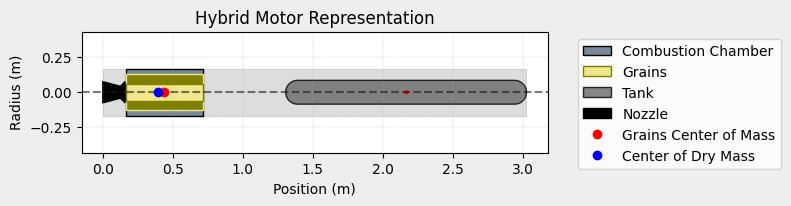

In [12]:
Kraken.draw()

In [13]:
# Création de la fusée
kronos = Rocket(
    radius  = ROCKET_RAD,
    mass    = ROCKET_MASS,
    inertia = ROCKET_INERTIA,

    center_of_mass_without_motor  = ROCKET_CM,
    coordinate_system_orientation = ROCKET_COORDS,
    
    power_off_drag = powerOff_function,
    power_on_drag  = powerOn_function
)

In [14]:
# Ajout nose cone
nose = kronos.add_nose(
    length    = NC_L,
    kind      = NC_KIND,
    position  = NC_POS
    # bluffness = NC_BLUFF
)

In [15]:
# Ajout parachutes
main_parachute = kronos.add_parachute(
    name    = MAIN_NAME,
    cd_s    = MAIN_CD,
    trigger = MAIN_EJECT,
    lag     = MAIN_LAG
)

drag_parachute = kronos.add_parachute(
    name    = DRAG_NAME,
    cd_s    = DRAG_CD,
    trigger = DRAG_EJECT,
    lag     = DRAG_LAG
)

In [16]:
# Ajout ailettes
fins = kronos.add_trapezoidal_fins(
    n           = FIN_N,
    root_chord  = FIN_RC,
    tip_chord   = FIN_TC,
    span        = FIN_SPAN,
    position    = FIN_POS,
    sweep_length = FIN_SWEEP
)

In [17]:
# Ajout boattail
boattail = kronos.add_tail(
    top_radius    = TAIL_TOP,
    bottom_radius = TAIL_BOTTOM,
    length        = TAIL_L,
    position      = TAIL_POS
)

In [18]:
# Ajout moteur
kronos.add_motor(Kraken, 0)

ValueError: array must not contain infs or NaNs

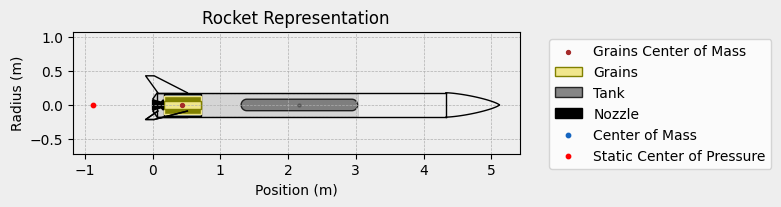

In [19]:
kronos.draw()

In [20]:
# Creation de l'environment
env = Environment(
    date      = DATE,
    latitude  = LAT,
    longitude = LON,
    elevation = ELEVATION
)
env.set_date(DATE)
env.set_atmospheric_model(type="Forecast", file="GFS")

In [21]:
# Simulation du vol
test_flight = Flight(
    rocket      = kronos,
    environment = env,
    rail_length = RAIL_L,
    inclination = RAIL_INC,
    heading     = RAIL_HEAD  
)

In [22]:
test_flight.info()


Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 0.06 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.997 | e1: -0.052 | e2: 0.003 | e3: -0.052
Euler Angles - Spin φ : -0.00° | Nutation θ: -6.00° | Precession ψ: -6.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Surface Wind Conditions

Frontal Surface Wind Speed: 2.79 m/s
Lateral Surface Wind Speed: 0.53 m/s


Launch Rail

Launch Rail Length: 9.144  m
Launch Rail Inclination: 84.00°
Launch Rail Heading: 6.00°


Rail Departure State

Rail Departure Time: 0.000 s
Rail Departure Velocity: 0.000 m/s
Rail Departure Stability Margin: nan c
Rail Departure Angle of Attack: 95.895°
Rail Departure Thrust-Weight Ratio: nan
Rail Departure Reynolds Number: 6.490e+04


Burn out State

Burn out time: 12.250 s
Altitude at burn out: 0.000 m (AGL)
Rocket velocity at burn out: 0.000 m/s
Freestream velocity at burn out: 2.842 m/s
Mach Number at burn out: 0.008


ValueError: array must not contain infs or NaNs